## Load and reduce size of the data 

**Steps followed to reduce the size of the data**
1. Use the python dask library to load gzipped files and remove the extra columns
2. Save the files in pickle formats (reduced size)
3. Again load the files and prepare small datasets used for each question below.

**Total 10 small sized pickle files are created from the large gzip files which are:**
1. counts.pkl - used to count total number of tweet in Part1, question1.
2. df_counts.pkl - used for counting the no of tweets per date in Part4, question1
3. df_hour.pkl - used to plot the hourly tweets in Part1, question6
4. df_lang.pkl - used to breakdown tweets by language in Part1,question3
5. df_men.pkl - used for calculating most mentions persons, Part3, question3
6. df_mentions.pkl - used for calculating no of mentions per user, Part3, question4
7. df_time.pkl - used to plot time series in Pat1,question2.
8. df_user.pkl - used to calculate the user with highest no of tweets.
9. df_weekend.pkl - used to plot box-plot for weekdays and weekend tweets in Part1,question5
10. list_cord.pkl - used to plot the head map of coordinates on the map of Europe

# Following are the 4 code sections for preprocessing

### Imports:-- 
    In this section we have imported all the necessary libraries

### Function for filtering and cleaning the raw dataset:-- 
    In this section of code we have created a filter function which will take only 9 required parameters from the gzip files

### Load the .gz files and save in pickle format:-- 
    In this part of code we call the filter function for every gzip files and only take the required attributes and make shorter pickle files

### Furthur reduce the size by only creating datasets which are needed for our analysis:-- 
    In this part of code we further process the pickle files and prepare 10 smaller pickle files as mentioned above and also also load 9 dataframes and 1 count value in a dictionary called "files" which we will use use to solve our challenges

## Part 1. Basic Stats (25 marks)




#### Question 1. Download the data [0 marks]


#### Question 2. Count the total number of tweets, describing how you deal with duplicates or other anomalies in the data set. [5 marks]

Answer 2: 
    
The total number of tweets are 24,780,929. The large gz files are converted into comparatively smaller pickle files which are then taken into dataframes for taking out the useful and necessary information to solve this problem. From this DataFrame, we have taken out only the information we need into smaller pickle files and used pandas drop_duplicates method on the total number of tweets to remove all the duplicate entries and get the unique tweet counts. This approach helped me to get rid of duplicates, anomalies and handle the large dataset.

In [5]:
print('total number of tweets are {}'.format(files['counts'])) # print the total counts

total number of tweets are 24780929


As can be seen from above the total number of tweets are 24,803,671. The duplicates are removed while cleaning the dataset using pandas drop_duplicates method.

#### Question 3. Plot a time-series of the number of tweets by day. Comment on what you see.[5 marks]

Answer 3: 

Please find below the time series plot of the number of tweets by day. As can be seen from the following plot that since the start of March, there had been gradual but continuous increase in number of tweets every week, especially 2nd and 3rd week of march has seen considerable increase in number of tweets which finally settled and reduced around last week. As per the analysis it look the trend of COVID contributed in some cases as the month of March has seen surge in number of covid at most of the European countries. 21st March was the day with highest number of tweets for the month.

<AxesSubplot:title={'center':'Time Series Plot of Number of tweets by day'}, xlabel='date', ylabel='No of tweets'>

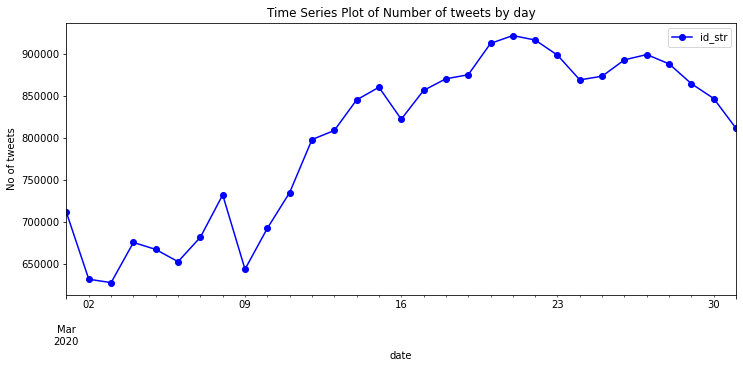

In [29]:
files['df_time'].groupby('date')['id_str'].sum().reset_index().plot(kind='line',
    style='b-o',title="Time Series Plot of Number of tweets by day",ylabel="No of tweets",
    x='date',y='id_str',figsize=(12,5)) # plot the data in df_time

In [31]:
# top 10 days with highest number of tweets
files['df_time'].groupby('date')['id_str'].sum().sort_values(ascending=False).iloc[0:10] 

date
2020-03-21    922551
2020-03-22    917192
2020-03-20    913214
2020-03-27    899928
2020-03-23    899201
2020-03-26    893632
2020-03-28    888828
2020-03-19    875851
2020-03-25    874150
2020-03-18    871068
Name: id_str, dtype: int64


#### Question 4: Show a breakdown of the number of tweets by language and discuss your findings [5 marks]

Answer 4: 

Please find below the number of tweets by language. As can be seen, the most used twitter language has been English in Europe which actually resembles with with the language statistics of Europe as English has the largest number of speakers in Europe. Following this the other widely spoken languages are turkish, spanish and french, which make sense as these are the languages most spoken in Europe.

<AxesSubplot:title={'center':'Breakdown of the number of tweets by language'}, xlabel='lang', ylabel='No of tweets'>

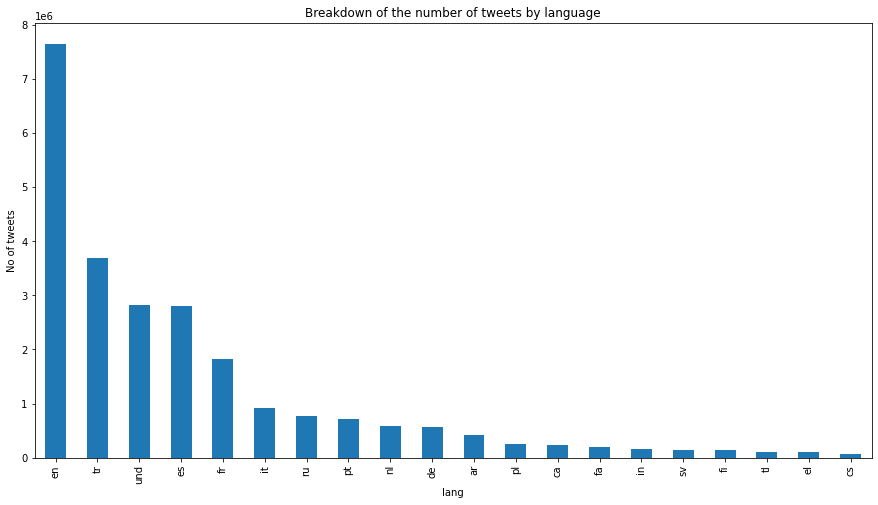

In [32]:
# groupby language and take sum to get total number of tweets
files['df_lang'].groupby('lang')['id_str'].sum().sort_values(ascending=False).iloc[0:20].plot(
    kind='bar',title="Breakdown of the number of tweets by language",ylabel="No of tweets",figsize=(15,8)) 

#### Question 5: Using a box and whisker diagram (https://en.wikipedia.org/wiki/Box_plot) compare the number of tweets on a weekday (Monday-Friday) to weekend days (Saturday-Sunday). What pattern do you observe? [5 marks] 

Answer 5:

Please find below the box plots of the tweets on weekdays and weekends by Europeans. As can be seen, number of tweets on weekends are slightly higher than on weekdays possibly because of the more personal social networking time on weekends.

Text(0, 0.5, 'No of tweets')

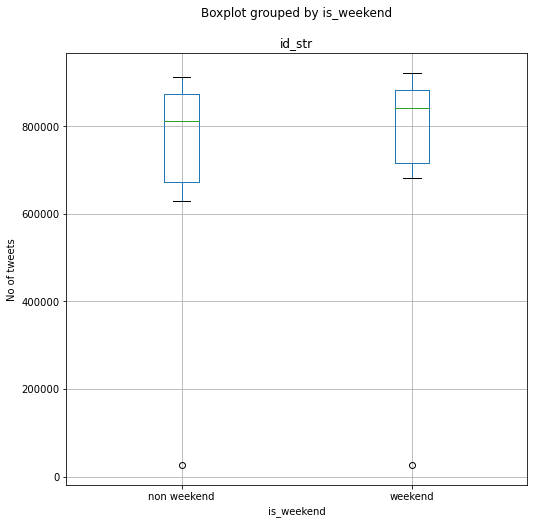

In [33]:
# plot the tweets on weekdays and weekends.
files['df_weekend'].boxplot(column='id_str',by='is_weekend',figsize=(8,8)).set_ylabel('No of tweets') 


#### Question 6: There are multiple different time zones across Europe. Accounting for this, plot the average number of tweets at each hour of the day across the time period and comment. [5 marks] 

Answer 6: 

Please find below the plot of average no of tweets by the hour of the day. As can be seen, the number of tweets gradually increases from the early hours and the peak hour for the tweets are around 20th hour (UTC), which make sense as lots of tweets are happening in the everning time after working hour which sharply drops after 8 PM till following day morning.

<AxesSubplot:title={'center':'Number of tweets by hour of the day'}, xlabel='hour', ylabel='No of tweets'>

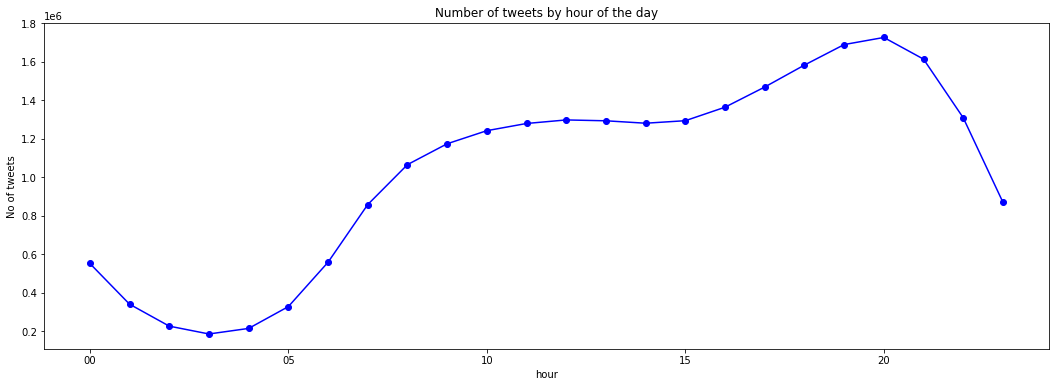

In [34]:
# groupby hour of the day and plot the count of tweets
files['df_hour'].groupby('hour')['id_str'].sum().plot(kind='line',style='b-o',
                                                      title="Number of tweets by hour of the day",
                                                      ylabel="No of tweets",figsize=(18,6)) 

## Part 2. Mapping (20 marks)
#### Question 1:  Draw a map of Europe showing the location of the GPS-tagged tweets - these are tweets which have a “coordinates” field in the metadata. The exact form of the map is up to you, you can show individual tweets as points, you can use a heat map or a choropleth: marks will be given for accuracy, clarity and presentation. [15 marks]

Answer 1: 

The heatmap is plotted using the folium library of python. The coordinates are plotted on the map of Europe as per the requirement and the coordinates are plotted on the map to Europe. As can be seen in the map that the coordinates are mostly from europe and the heatmap is highly concentrated over European region.    
           If we zoom the map a little bit, we can see the tweets are concentrated towards bigger cities like London, Birmingham, Cardiff, Paris, Dusseldorf, Hamburg, Munich, Barcelona, Lisbon and mostly bigger cities of each country. This is because as per the statistics in the following link the most user groups of Twitter belong to the age group bwetween 18-49 and such age group people mostly concentrated around bigger cities for study, business, job and work. Also such bigger cities have more population density where as towards the country side the tweet density becomes less because of less and comparatively older population.
           
https://www.statista.com/statistics/283119/age-distribution-of-global-twitter-users/

In [35]:
#!pip install folium
import folium
from folium.plugins import HeatMap
# load the folium map function with zoom 3 and focused loacation of given coordinates
m7=folium.Map(location=[54.5, 15.2],zoom_start=3) 

# plot the heatmap with top 10000 (more coordiantes make it slow) coordinates on above loaded map
HeatMap(files['list_cord'][0:10000],radius=8).add_to(m7) 
m7

#### Question 2: Explain any patterns you observe. [5 marks] HINT: Some popular libraries for making maps with python are cartopy (https://scitools.org.uk/cartopy/docs/latest/) for drawing the outlines of regions using matplotlib or Folium (https://python-visualization.github.io/folium/ ) for integration with mapping platforms like open street maps. 

Answer 2: 

The tweets are from the Europe region and distributed across the continent. As can be seen in the heat map that the coordinates are highly concentrated(dense colors) on many countries of Europe like France, Spain, Germany, United Kingdom, Romania, Turkey, Italy, Netherland, Denmark and many other countries as per the tweet activity of the users of the respective countries. As stated in my previous answer, the tweet density is more around the bigger cities of the respective countries and less density towards country side or far away from cities.

## Part 3. Users (20 marks)
#### Question 1. Make a histogram of tweets per user with number of users on the y-axis and number of tweets they make on the x-axis. Describe the distribution that you see. [5 marks]

Answer 1: 

Find below the histogram with no of users on y-axis and no of tweets on x-axis. As can be seen, it is right skewed distribution as most of the users make 1 tweet in a day, almost half of the users tweet 2 per day and then significantly reducing the number of users with more tweets per day.

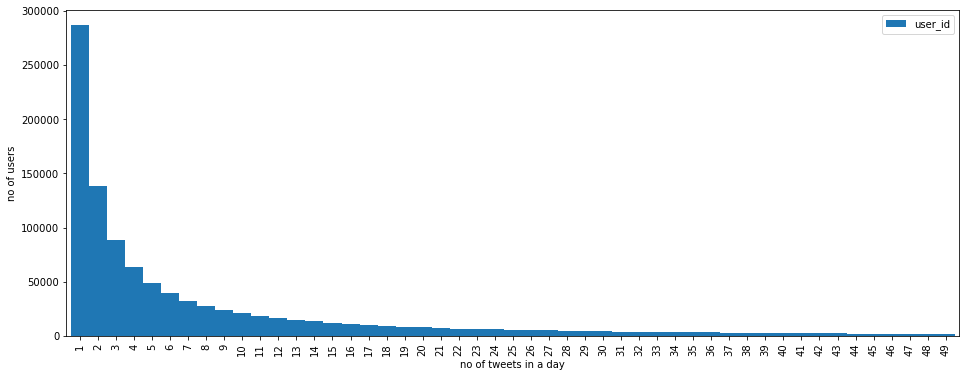

In [39]:
k=files['df_user'].groupby(['user_id'])['id_str'].sum().reset_index() # get tweets count by uer_ids
k1=k.groupby('id_str')['user_id'].count().reset_index() # groupby above data to get no of users by no of tweets in a day
ax=k1[k1['id_str']<50].plot(kind='bar', ylabel='no of users',xlabel='no of tweets in a day',
                            figsize=(16,6),x='id_str',y='user_id', width=1.0) # plot the above data 

#### Question 2. Find the top-10 users by total number of tweets. Do you think any are automated accounts? Justify your answer. [5 marks]

Answer 2: 

Please find below the top-10 users by total number of tweets. As can be seen from the names, they are mostly coming from the automated accounts like - "BB radio playlist", "Radio teddy" , "Seen on OLIO" and some look like now non-existent or suspended accounts which could be due to violations of Twitter rules or spamming using automation.

In [37]:
# top 10 users with total no of tweets
files['df_user'].groupby('user_name')['id_str'].sum().sort_values(ascending=False)[0:10].reset_index() 

,user_name,id_str
0,Seen on OLIO,37350
1,infosrv,21420
2,.,19330
3,Animals Belize,13630
4,Koray Davulcu,12015
5,L'hora catalana,11885
6,BB RADIO Playlist,8565
7,Radio TEDDY Playlist,8546
8,Haykakan.top,8522
9,Alex,8160


##### Question 3. Plot the number of mentions per user and comment on it. [5 marks]

Answer 3: 

Please find below the nuber of mentions per user. As can be seen that the frequency of tweets having less than 500 mentions are considerably very high, followed by much lesser numer of tweets having higher number of mentions.

<AxesSubplot:ylabel='Frequency'>

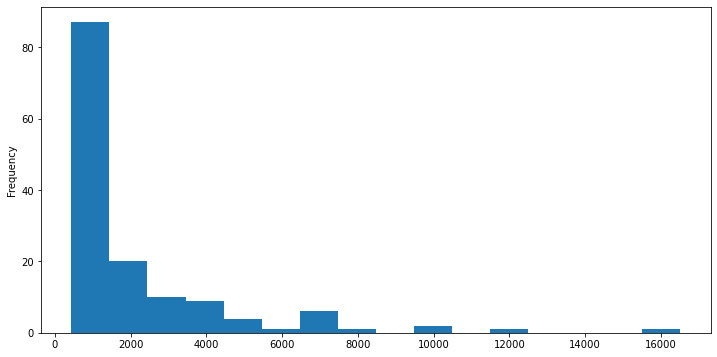

In [40]:
files['df_men'].reset_index().groupby('user_id')['num_mentions'].sum().sort_values(ascending=False).plot(
    kind='hist', bins=16,figsize=(12,6))

#### Question 4. Study some of the users who are mentioned the most and try to understand why. [5 marks] 

Answer 4: 

Following are the top 10 users mentioned. The list clearly shows most mentioned words are mostly famous personalities with millions of followers or trends like "Stay home" during Covid Pandemic or any quote or lively comments by any of these personalities which ended up their names in most of the re-tweet and hashtags.

In [41]:
files['df_mentions'].reset_index().groupby('mentions')['id_str'].sum().sort_values(ascending=False).iloc[0:10].reset_index()

,mentions,id_str
0,Piers Morgan,33110
1,Dr. Fahrettin Koca,28203
2,YouTube,24782
3,방탄소년단,21726
4,Boris Johnson #StayHomeSaveLives,20169
5,Donald J. Trump,19160
6,Boris Johnson,18117
7,Pedro Sánchez,13439
8,Recep Tayyip Erdoğan,12564
9,YouTube #StayHome,11993


## Part 4. Events (25 marks)
#### Question 1. Visually identify 3 days with unusually high activity in countries of your choosing. For example you could choose two days in the UK and one in France. Describe and justify how you locate tweets in countries and identify ‘unusual days’. [10 marks] 

Answer 1: 

We have picked two countries UK and France to find the dates in which the users from these countries did most number of tweets. We have extracted and made a dictionary with 'date', 'country' and the number of tweets which is reprseted as 'id_str'. We have extracted the dataframe by sorting the number of tweets and received the following 2 tables with first 10 highest to lowest number of tweets for the month of March 2020. As we see, 26th March and 20th March are the days when people from UK tweeted most for the month. and 16th March 2020 is the day when French people tweeted most number of tweets for the month.

Also one trend I have noticed that though the mentioned dates are highest for the month, it is not a lot significatly higher than other days in the top 10 days of highest tweets.

In [42]:
# groupby date and country and count the tweets
files['df_count']=files['df_count'].groupby(['date','country'])['id_str'].sum().reset_index()

# take from UK and list top 10
files['df_count'][(files['df_count'].country=='United Kingdom')].sort_values(by='id_str',ascending=False).iloc[0:10] 

,date,country,id_str
8209,2020-03-26,United Kingdom,265509
6388,2020-03-20,United Kingdom,256700
7298,2020-03-23,United Kingdom,256454
8515,2020-03-27,United Kingdom,255938
8815,2020-03-28,United Kingdom,253776
6695,2020-03-21,United Kingdom,252843
7604,2020-03-24,United Kingdom,252791
6998,2020-03-22,United Kingdom,249121
7900,2020-03-25,United Kingdom,243679
9122,2020-03-29,United Kingdom,236639


In [43]:
# take from France and list top 10 days
files['df_count'][(files['df_count'].country=='France')].sort_values(by='id_str',ascending=False).iloc[0:10] 

,date,country,id_str
4941,2020-03-16,France,86715
5251,2020-03-17,France,82170
6501,2020-03-21,France,81442
6190,2020-03-20,France,79972
6804,2020-03-22,France,79576
5878,2020-03-19,France,79561
5560,2020-03-18,France,78496
4619,2020-03-15,France,77619
8324,2020-03-27,France,76701
7710,2020-03-25,France,76483


##### As can be seen above we can choose the three dates i.e 2020-03-26 and 2020-03-20 from united states and 2020-03-16 from France

#### Question 2. Characterise each of these three days. Exactly how you do this is up to you, but for example you could: Display some indicative Tweets. Make a word cloud from the tweet text. Plot tweets locations on a map. Summarise the events you have detected and validate with some other source of data e.g. news articles. [15 marks]

Answer 2: 

The one common thing about all these dates is COVID as in March corona cases was uprising in almost all countries: Following is the analysis as per the external sources and word cloud:

UK: 26th March 2020

As we can see in the word cloud, the most words were related Corona Virus. On this day people across UK cheered, claped, and rang bells in appreciation of the National Healthcare Services health workers, also UK COVID death case raised by 100 that day to reach the highest death and cases of that time. It was the 3rd day of lockdown and even with wider range of restrictions. Following are the links to confirm the same.
https://www.telegraph.co.uk/news/2020/03/27/thank-nhs-clap-carers/
https://en.wikipedia.org/wiki/2020_in_the_United_Kingdom

We can see in Wordcloud also, many tweets consist of words like "Week pass", "Way home", "thank everyone", "thanks nhs", "thank nhsuk", "round applause" and similar words like that.


UK: 20th March 2020

On 20 March, the government announced the closure of public venues, such as pubs, restaurants, gyms, leisure centres, nightclubs, theatres and cinemas. The headlines were mostly dominated by Covid as the cases were uprising with every passing day. Hence we have words like "time home", "way home", "toilet roll", "self isolation", "time crisis".
    
Also it looks an article on the analysis of the growth of coronavirus was written by "tomas pueyo" on 19th March 2020, which trended on Twitter on next day and were retweeted by multiple accounts.    
    
https://www.bbc.co.uk/news/uk-51981653
https://en.wikipedia.org/wiki/2020_in_the_United_Kingdom
https://tomaspueyo.medium.com/coronavirus-the-hammer-and-the-dance-be9337092b56



France: 16th March 2020

In this wordcloud mostly random words depicted which gets translated in English to "who cares", "really nothing", "really too much", "really good", "virus goes". As per my analysis this looks related to the French Government's decision to impose 15 days strict lockdown and mobilisation of 100,000 police to enforce the restrictions. The tweeted words looks to be related to the reaction of the French Citizens to its Prime Minister's decision. Follwoing are the external links to confirm the same.

https://www.independent.co.uk/news/world/europe/coronavirus-france-lockdown-cases-update-covid-19-macron-a9405136.html
https://www.france24.com/en/20200316-live-france-s-macron-addresses-nation-amid-worsening-coronavirus-outbreak

In [44]:
df1=pd.read_pickle('Outputs/processed_geoEurope_20200326.pkl') # read data with selected dates from above
df1=df1[df1['country']=='United Kingdom']
df2=pd.read_pickle('Outputs/processed_geoEurope_20200320.pkl')
df2=df2[df2['country']=='United Kingdom']
df3=pd.read_pickle('Outputs/processed_geoEurope_20200314.pkl')
df3=df3[df3['country']=='France']

In [47]:
# text data cleaning
!pip install swifter
import swifter
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
def preprocess(x):
  tokens = word_tokenize(x) # tokenize the data
  tokens = [w.lower() for w in tokens]
  
  table = str.maketrans('', '', string.punctuation) # remove punctuations from the tweets
  stripped = [w.translate(table) for w in tokens]
  words = [word for word in tokens if word.isalpha()] # remove alphanumeric characters
  stop_words = set(stopwords.words('english'))|set(stopwords.words('french')) # remove english and french stop words
  words = [str(w) for w in words if not w in stop_words]
  words=[i[0] for i in nltk.pos_tag(words) if i[1]=='NN'] # take only nouns
  return ' '.join(words)

### Clean the text in the 3 datasets

In [53]:
df1['text']=df1['text'].swifter.apply(lambda x: preprocess(x)) # apply the above text cleaning function in the tweets
df2['text']=df2['text'].swifter.apply(lambda x: preprocess(x))
df3['text']=df3['text'].swifter.apply(lambda x: preprocess(x))

### Plot the wordcoluds for the 3 datasets

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\debas\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


(-0.5, 399.5, 199.5, -0.5)

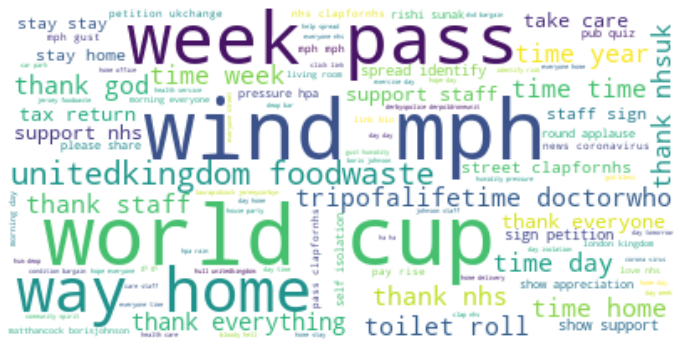

In [54]:
nltk.download('averaged_perceptron_tagger') # download some dependencies
from sklearn.feature_extraction.text import CountVectorizer

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# vectorize the tweets
vectorizer = CountVectorizer(ngram_range=(2,2),min_df=50,max_df=500,stop_words=['https','work','today']) 
X = vectorizer.fit_transform(df1['text'])

# plot the wordcoud with the text data
wordcloud = WordCloud(max_font_size=50, max_words=100, 
                      background_color="white").generate_from_frequencies(vectorizer.vocabulary_)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

<Figure size 432x288 with 0 Axes>

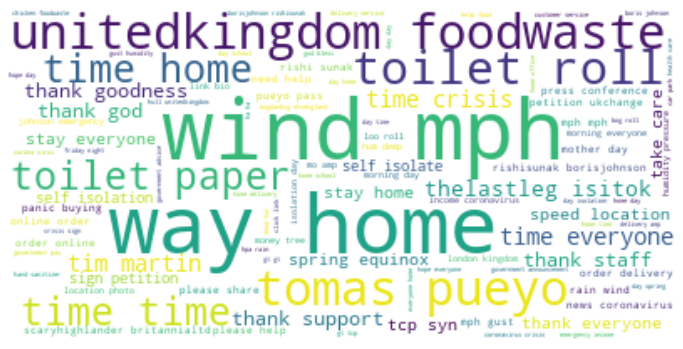

In [55]:
# repeat above wordclouds for different dates
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

vectorizer = CountVectorizer(ngram_range=(2,2),min_df=50,max_df=500,stop_words=['https','work','week','year','today'])
X = vectorizer.fit_transform(df2['text'])
wordcloud = WordCloud(max_font_size=50, max_words=100, 
                      background_color="white").generate_from_frequencies(vectorizer.vocabulary_)
plt.figure()
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

<Figure size 432x288 with 0 Axes>

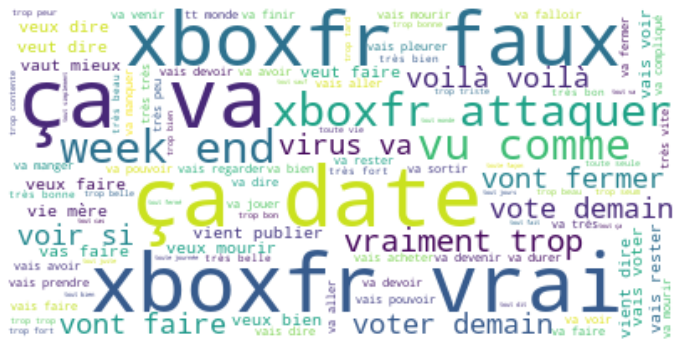

In [56]:
vectorizer = CountVectorizer(ngram_range=(2,2),min_df=10,stop_words=['https'])
X = vectorizer.fit_transform(df3['text'])
wordcloud = WordCloud(max_font_size=50, max_words=100, 
                      background_color="white").generate_from_frequencies(vectorizer.vocabulary_)
plt.figure()
plt.figure(figsize=(12,8))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

### Plot the tweets on maps from above selected 3 day

In [57]:
ll1=df1['coordinates'].dropna().apply(lambda x: [x['coordinates'][1],x['coordinates'][0]]).tolist()
ll2=df2['coordinates'].dropna().apply(lambda x: [x['coordinates'][1],x['coordinates'][0]]).tolist()
ll3=df3['coordinates'].dropna().apply(lambda x: [x['coordinates'][1],x['coordinates'][0]]).tolist()
#!pip install folium
import folium
from folium.plugins import HeatMap
def plot_map(coordinates):
    # load the folium map function with zoom 3 and focused loacation of given coordinates
  m7=folium.Map(location=[54.5, 15.2],zoom_start=4) 
  HeatMap(coordinates,radius=8).add_to(m7) # plot the heatmap with top 10000 (more coordiantes make it slow) coordinates on above loaded map
  return m7


In [58]:
# Tweet locations in UK for 26th March 2020
plot_map(ll1)

In [61]:
# Tweet locations in UK for 20th March 2020
plot_map(ll2)

In [60]:
# Tweet locations in GFrance for 16th March 2020
plot_map(ll3)

As can be seen from above wordcloud, people are talking about the world cup , high wind and stay home etc. Frow news we can verify that world cup was going on during the time and due to covid 19 people are talking about stating home and work from home etc.

## Part 5. Reflection (10 marks)
#### Quesions: Critically reflect on using Twitter data to find events. For example you might discuss
1. The strengths and weaknesses of Twitter as a data source.
2. Biases in the data
3. Ethical and legal concerns
Write no more than 500 words. 

Answer :     

    The main advantage of Twitter as a data source is its open accessibility compared to other social media platform. Twitter data enables us to understand quickly about people’s sentiment in the digital platform about any ongoing topic, incident, rules, or events; Twitter has around 320 Million active users worldwide and hence analysing the data can help us to track the spread of any disease, do political analysis, election forecasting and a range of similar analysis from many sectors. Hence, Twitter has the strength of providing much analysis which can help to make wiser decisions, making improvements in products or services, improve citizen lifestyle and making our society a better place.

	Sentiment analysis is a popular technique that programmers solve using Twitter data, but programs find difficult to recognize things like jokes, negotiations, irony, exaggerations and failing to recognize these can skew the results. Many tweets consist or short sentences, pieces of text which are commonly used in social network platforms, but such data make it difficult to do a proper data analysis. Disadvantages also include a lack of transparency regarding how tweets are sampled within the stream and the potential for missing data if query limits are reached and the connection to the API must pause temporarily. Also Twitter data some times turn out to be biased toward certain person or events or facts which goes viral by ignoring other facts and truths.
    
	Twitter can often be biased because sometimes it can be difficult to identify some useful events due to some concurrent events. For example, finding some smaller but useful events during covid-19 announcements or decisions would be difficult as most of the tweets would be related the covid-19 or government regulations. This way data can be biased as most people are usually emotional towards larger decisions or events and that can make the data not much useful for tracking any smaller events.
    
	Informed consent is a critical component of the legal and ethics aspects of all types of research and analysis. It is common to think that a social media user having agreed to the terms and conditions of Twitter platform many of which include clauses on the accessing and re-use of data by third parties for research and analysis purpose. This is particularly problematic when many Twitter user and analyst report not having read the terms and conditions of use properly. An import aspect of informed consent is the right to withdraw any sensitive or instigating or private tweet which does not follow Twitter guidelines, users and Twitter talks days to realise, is such cases the developer or researchers should be aware of the legal and ethical aspect of using such tweets. Finally, the responsibility is on the analyst of the researcher’s sense of ethical approach in collecting, analysing, and re-using the data collected from Twitter.

References:
[01] Social Media Research: A Guide to Ethics
https://www.gla.ac.uk/media/Media_487729_smxx.pdf
